In [1]:
import sqlite3

In [2]:
connection=sqlite3.connect("mydb.db")

In [3]:
table_creation_query = """
CREATE TABLE IF NOT EXISTS supply (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    item_name TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    supplier TEXT,
    date_added DATE DEFAULT CURRENT_DATE
);
"""

In [4]:
table_creation_query2 = """
CREATE TABLE IF NOT EXISTS product (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_name TEXT NOT NULL,
    price REAL NOT NULL,
    stock_quantity INTEGER NOT NULL,
    category TEXT,
    date_added DATE DEFAULT CURRENT_DATE
);
"""

In [5]:
cursor=connection.cursor()

In [6]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)




In [7]:
insert_supply_query = """
INSERT INTO supply (item_name, quantity, supplier) 
VALUES (?, ?, ?);
"""
insert_product_query = """
INSERT INTO product (product_name, price, stock_quantity, category) 
VALUES (?, ?, ?, ?);
"""


In [8]:
supply_data = [
    ("Steel Rods", 50, "ABC Suppliers"),
    ("Cement Bags", 100, "XYZ Cement Co."),
    ("Bricks", 500, "Brick World"),
    ("Wood Planks", 200, "Timber Corp"),
    ("Nails", 1000, "Hardware Hub")
]

product_data = [
    ("Laptop", 799.99, 10, "Electronics"),
    ("Smartphone", 499.99, 20, "Electronics"),
    ("Office Chair", 120.50, 15, "Furniture"),
    ("Table Lamp", 35.99, 25, "Home Decor"),
    ("Backpack", 45.00, 30, "Accessories")
]



In [9]:
cursor.executemany(insert_supply_query,supply_data)
cursor.executemany(insert_product_query,product_data)
    

In [10]:
connection.commit()

In [11]:
cursor.execute("select * from product;")

In [12]:
for row in cursor.fetchall():
    print(row)

(1, 'Laptop', 799.99, 10, 'Electronics', '2025-02-04')
(2, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-04')
(3, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-04')
(4, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-04')
(5, 'Backpack', 45.0, 30, 'Accessories', '2025-02-04')
(6, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05')
(7, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05')
(8, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05')
(9, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05')
(10, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05')
(11, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05')
(12, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05')
(13, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05')
(14, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05')
(15, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05')
(16, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05')
(17, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05')
(18, 'Office Chair', 120.5

In [13]:
from langchain_community.utilities import SQLDatabase

In [14]:
db=SQLDatabase.from_uri("sqlite:///mydb.db")

In [15]:
db

In [16]:
db.dialect

'sqlite'

In [17]:
db.get_usable_table_names()

['product', 'supply']

In [18]:
from langchain_groq import ChatGroq


In [19]:
llm = ChatGroq(model="llama3-70b-8192", api_key="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")


In [20]:
llm.invoke("hello how are you?")

AIMessage(content="Hello! I'm just a language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 15, 'total_tokens': 63, 'completion_time': 0.146212828, 'prompt_time': 0.003601859, 'queue_time': 0.13174228999999998, 'total_time': 0.149814687}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-48e99e6b-8929-4221-a947-5118d4ff0b0e-0', usage_metadata={'input_tokens': 15, 'output_tokens': 48, 'total_tokens': 63})

In [21]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit


In [22]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [23]:
tools=toolkit.get_tools()

In [24]:
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000021F6F5FF670>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000021F6F5FF670>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000021F6F5FF670>),
 QuerySQLCheckerTool(description='Use this tool to 

In [25]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [26]:
list_tables_tool=next((tool for tool in tools if tool.name=="sql_db_list_tables"),None)

In [27]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000021F6F5FF670>)

In [28]:
get_schema_tool=next((tool for tool in tools if tool.name=="sql_db_schema"),None)

In [29]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000021F6F5FF670>)

In [30]:
list_tables_tool.invoke("")

'product, supply'

In [31]:
print(get_schema_tool.invoke("product"))


CREATE TABLE product (
	id INTEGER, 
	product_name TEXT NOT NULL, 
	price REAL NOT NULL, 
	stock_quantity INTEGER NOT NULL, 
	category TEXT, 
	date_added DATE DEFAULT CURRENT_DATE, 
	PRIMARY KEY (id)
)

/*
3 rows from product table:
id	product_name	price	stock_quantity	category	date_added
1	Laptop	799.99	10	Electronics	2025-02-04
2	Smartphone	499.99	20	Electronics	2025-02-04
3	Office Chair	120.5	15	Furniture	2025-02-04
*/


In [32]:
from langchain_core.tools import tool
@tool
def db_query_tool(query:str)->str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [33]:
db_query_tool.invoke("SELECT * FROM product;")


"[(1, 'Laptop', 799.99, 10, 'Electronics', '2025-02-04'), (2, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-04'), (3, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-04'), (4, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-04'), (5, 'Backpack', 45.0, 30, 'Accessories', '2025-02-04'), (6, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (7, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (8, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05'), (9, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05'), (10, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05'), (11, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (12, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (13, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05'), (14, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05'), (15, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05'), (16, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (17, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (18, 'O

In [34]:
db.run("SELECT * FROM product;")

"[(1, 'Laptop', 799.99, 10, 'Electronics', '2025-02-04'), (2, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-04'), (3, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-04'), (4, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-04'), (5, 'Backpack', 45.0, 30, 'Accessories', '2025-02-04'), (6, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (7, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (8, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05'), (9, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05'), (10, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05'), (11, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (12, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (13, 'Office Chair', 120.5, 15, 'Furniture', '2025-02-05'), (14, 'Table Lamp', 35.99, 25, 'Home Decor', '2025-02-05'), (15, 'Backpack', 45.0, 30, 'Accessories', '2025-02-05'), (16, 'Laptop', 799.99, 10, 'Electronics', '2025-02-05'), (17, 'Smartphone', 499.99, 20, 'Electronics', '2025-02-05'), (18, 'O

In [35]:
llm_with_tools=llm.bind_tools([db_query_tool])


In [36]:
llm_with_tools.invoke("SELECT * FROM Employees;")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_er4a', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 947, 'total_tokens': 995, 'completion_time': 0.146924806, 'prompt_time': 0.054828298, 'queue_time': 0.18751405100000001, 'total_time': 0.201753104}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7235d550-ecf7-4ebc-a0d3-32cd7b575bbc-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_er4a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 48, 'total_tokens': 995})

In [37]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [38]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [39]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

query_check = query_check_prompt | llm.bind_tools([db_query_tool])



In [40]:
query_check.invoke({"messages": [("user", "SELECT * FROM product LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wd0j', 'function': {'arguments': '{"query":"SELECT * FROM product LIMIT 5;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1051, 'total_tokens': 1102, 'completion_time': 0.16127734, 'prompt_time': 0.05837269, 'queue_time': 0.021098527, 'total_time': 0.21965003}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cf40f0af-76d8-42b1-92c7-ff4678694aa4-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM product LIMIT 5;'}, 'id': 'call_wd0j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1051, 'output_tokens': 51, 'total_tokens': 1102})

In [41]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

In [42]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer. When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.

11. rewrite this promote with very simple english and little shorter manner also """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [43]:
query_gen_prompt

ChatPromptTemplate(input_variables=[], optional_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annot

In [44]:
query_generator.invoke({"messages": [("can you fetch the data from product table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_k7qk', 'function': {'arguments': '{"final_answer":"SELECT * FROM product LIMIT 5"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 1227, 'total_tokens': 1308, 'completion_time': 0.256222568, 'prompt_time': 0.085552718, 'queue_time': 0.045563881, 'total_time': 0.341775286}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-88a7b774-b1a0-418d-9b6b-1faa21877ac4-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'SELECT * FROM product LIMIT 5'}, 'id': 'call_k7qk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1227, 'output_tokens': 81, 'total_tokens': 1308})

In [45]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [46]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [47]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

In [48]:
def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [49]:
def model_check_query(state:State):
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

In [50]:
def query_gen_node(state:State):
    message = query_generator.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was callead: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [51]:
def should_continue(state:State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"
    

In [52]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", create_node_from_tool_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool", create_node_from_tool_with_fallback([get_schema_tool]))
model_get_schema=llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema", lambda state:{"messages":[model_get_schema.invoke(state['messages'])]})
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_node_from_tool_with_fallback([db_query_tool]))

In [53]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [54]:
app=workflow.compile()


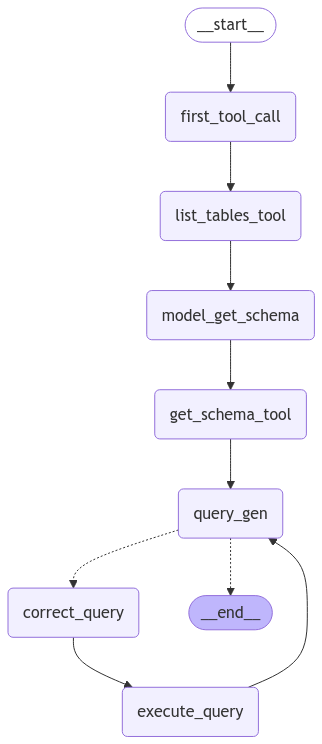

In [55]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [56]:
query={"messages": [("user", "tell me the name of every product?")]}


In [57]:
response=app.invoke(query)

In [58]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'Here are the details of the products and supplies: Laptop, Smartphone, Office Chair, Steel Rods, Cement Bags, Bricks'